<a href="https://colab.research.google.com/github/luke-scot/emissions-tracking/blob/main/imports_exports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
"""Installation and downloads"""
# Install floweaver and display widget packages
%pip install floweaver ipysankeywidget

In [ ]:
"""Display setup"""
# Enable widget display for Sankeys in Colab
from google.colab import output
output.enable_custom_widget_manager()

# Imports & exports

This recipe demonstrates how to show import and export flows to/from a simple process chain.

For demonstration, the CSV data is written directly in the cell below -- in practice you would want to load data a file.

In [ ]:
import pandas as pd
from io import StringIO

flows = pd.read_csv(StringIO("""
source,target,type,value
a,b,main,3
b,c,main,4
imports,b,import/export,2
b,exports,import/export,1
"""))

flows

Here is the basic structure of the Sankey diagram: a chain of processes `a -- b --- c`.

In [ ]:
from floweaver import *

# Set the default size to fit the documentation better.
size = dict(width=570, height=300)

nodes = {
    'a': ProcessGroup(['a']),
    'b': ProcessGroup(['b']),
    'c': ProcessGroup(['c']),
}

bundles = [
    Bundle('a', 'b'),
    Bundle('b', 'c'),
]

ordering = [
    ['a'],
    ['b'],
    ['c'],
]

sdd = SankeyDefinition(nodes, bundles, ordering)

weave(sdd, flows).to_widget(**size)

To get more control over the appearance of the import/export flows, they can be controlled using Waypoints:

In [ ]:
nodes = {
    'a': ProcessGroup(['a']),
    'b': ProcessGroup(['b']),
    'c': ProcessGroup(['c']),
    'imports': Waypoint(),
    'exports': Waypoint(),
}

bundles = [
    Bundle('a', 'b'),
    Bundle('b', 'c'),
    Bundle(Elsewhere, 'b', waypoints=['imports']),
    Bundle('b', Elsewhere, waypoints=['exports']),
]

ordering = [
    [['a'], ['imports']],
    [['b']],
    [['c'], ['exports']],
]

sdd = SankeyDefinition(nodes, bundles, ordering)

weave(sdd, flows).to_widget(**size)

To get different colours for imports/exports, we need to modify the SDD to use the `type` column to distinguish different types of flow:

In [ ]:
sdd = SankeyDefinition(nodes, bundles, ordering, flow_partition=Partition.Simple('type', ['main', 'import/export']))

weave(sdd, flows).to_widget(**size)

Finally, you can customise the colour scheme:

In [ ]:
weave(sdd, flows, palette={'main': 'steelblue', 'import/export': 'lightblue'}).to_widget(**size)

## Alternative style

An alternative style for showing imports & exports like this isn't currently supported:

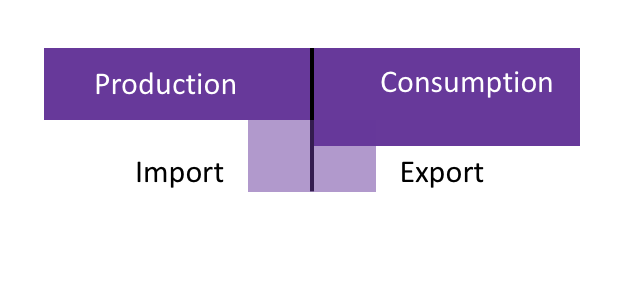

But it should be possible to support with minor changes to the Sankey diagram definition. For example, the difference between this style and the style shown above could be requested by changing:

```python
Bundle(Elsewhere, 'b', waypoints=['imports'])
```
to
```python
Bundle(Elsewhere, 'b', waypoints=[])
```

The lack of a waypoint would indicate that the flow should be shown as a short "stub".